<a href="https://colab.research.google.com/github/ortall0201/Spotify-Playlist-Recommender-System-Using-NLP/blob/main/Manor/Spotify_playlist_EDA_Basic_Cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Primary Data Structuring
* Dataset structure consists of four columns - user_id, artist, track name, and playlist name - given by the user
* Nevertheless it appeard that original file consisted of rows which some had many hyphens and quotation marks, making them appear as being of more or less than 4 columns.
* This was dealt with keeping the lines that were made of four elements, and then ensuring each element was indeed what it was intended to be.



In [1]:
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')
csv_file_path = '/content/drive/My Drive/Colab Notebooks/Final Project/spotify_dataset.csv'

Mounted at /content/drive


In [3]:
import csv

# First step - keeping rows of 4 elements only

# List to store valid rows
valid_rows = []

# Open the CSV file and filter for rows with 4 columns
with open(csv_file_path, 'r', encoding='utf-8') as file:
    reader = csv.reader(file)
    headers = next(reader)  # Read the header
    for row in reader:
        if len(row) == 4:  # Keep only rows with exactly 4 columns
            valid_rows.append(row)

# Convert valid rows to a DataFrame
df_valid = pd.DataFrame(valid_rows, columns=headers)

print(len(df_valid))

# Display the first few rows
df_valid.head()



12890475


,user_id,"""artistname""","""trackname""","""playlistname"""
0,9cc0cfd4d7d7885102480dd99e7a90d6,Elvis Costello,(The Angels Wanna Wear My) Red Shoes,HARD ROCK 2010
1,9cc0cfd4d7d7885102480dd99e7a90d6,Elvis Costello & The Attractions,"(What's So Funny 'Bout) Peace, Love And Unders...",HARD ROCK 2010
2,9cc0cfd4d7d7885102480dd99e7a90d6,Tiffany Page,7 Years Too Late,HARD ROCK 2010
3,9cc0cfd4d7d7885102480dd99e7a90d6,Elvis Costello & The Attractions,Accidents Will Happen,HARD ROCK 2010
4,9cc0cfd4d7d7885102480dd99e7a90d6,Elvis Costello,Alison,HARD ROCK 2010


In [4]:
# Second step - Dealing with single quotation marks (sign of corrupt line)

# Remove adjacent double quotation marks ("") in all rows and columns
df_cleaned = df_valid.applymap(lambda x: x.replace('""', '') if isinstance(x, str) else x)

# Filter rows where any column contains a single quotation mark - sign of a corrupted line (")
rows_with_quotes = df_cleaned[df_cleaned.apply(lambda x: x.astype(str).str.contains('"').any(), axis=1)]

# Count the number of corrupted rows
print(f"Number of rows containing single quotation mark: {len(rows_with_quotes)}")

# Display df after cleaning
rows_with_quotes

<ipython-input-4-06fd0373b33a>:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_cleaned = df_valid.applymap(lambda x: x.replace('""', '') if isinstance(x, str) else x)


Number of rows containing single quotation mark: 67072


,user_id,"""artistname""","""trackname""","""playlistname"""
304,07f0fc3be95dcd878966b1f9572ff670,Wolfgang Amadeus Mozart,"Serenade No. 13 in G Major, K. 525 Eine Kleine...",Classique
305,07f0fc3be95dcd878966b1f9572ff670,Ludwig van Beethoven,"Sonata No. 23 In F Minor, Op. 57 Appassionata""...",Classique
849,07f0fc3be95dcd878966b1f9572ff670,Sequoia Bisquits,Memories of green (from Squaresoft's Chrono Tr...,Starred
2037,944c80d26922ae634d6ce445b1fdff7f,"Matthew Mdot"" Finley""",Fire,Starred
2245,944c80d26922ae634d6ce445b1fdff7f,"Matthew Mdot"" Finley""",Tear It Down,Starred
...,...,...,...,...
12889469,488ead471813ae982119153f792e4a3e,Cher,You Haven't Seen the Last of Me (Almighty Radi...,Happy Atlanta Pride 2011!
12889578,488ead471813ae982119153f792e4a3e,"Atif Aslam, Pritam & Sunidhi Chauhan","Be Intehaan (From Race 2"")""",Mom's Indian Songs
12889579,488ead471813ae982119153f792e4a3e,Kanika Kapoor,"Chhil Gaye Naina (From NH10"")""",Mom's Indian Songs
12889584,488ead471813ae982119153f792e4a3e,Jeet Gannguli,"Khamoshiyan (From Khamoshiyan"")""",Mom's Indian Songs


In [5]:
# Subtract rows_with_quotes from df_cleaned
df_no_quotes = df_cleaned[~df_cleaned.index.isin(rows_with_quotes.index)]

# Display the result
print(df_no_quotes)

# Count the number of remaining rows
print(f"Number of rows in clean dataset: {len(df_no_quotes)}")


                                   user_id                      "artistname"  \
0         9cc0cfd4d7d7885102480dd99e7a90d6                    Elvis Costello   
1         9cc0cfd4d7d7885102480dd99e7a90d6  Elvis Costello & The Attractions   
2         9cc0cfd4d7d7885102480dd99e7a90d6                      Tiffany Page   
3         9cc0cfd4d7d7885102480dd99e7a90d6  Elvis Costello & The Attractions   
4         9cc0cfd4d7d7885102480dd99e7a90d6                    Elvis Costello   
...                                    ...                               ...   
12890470  2302bf9c64dc63d88a750215ed187f2c                       Mötley Crüe   
12890471  2302bf9c64dc63d88a750215ed187f2c                       John Lennon   
12890472  2302bf9c64dc63d88a750215ed187f2c                         Tom Petty   
12890473  2302bf9c64dc63d88a750215ed187f2c                         Tom Petty   
12890474  2302bf9c64dc63d88a750215ed187f2c                          Skid Row   

                                       

In [7]:
pip install unidecode


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 7.4 MB/s eta 0:00:00


In [8]:
# Third step - Standartizing text to ASCII

import unidecode

# Function to remove non-ASCII characters
def unify_to_ascii(text):
    if isinstance(text, str):
        return unidecode.unidecode(text)
    return text

# Apply to the entire DataFrame
df_cleaned_final = df_no_quotes.applymap(unify_to_ascii)

# Display a sample
print(df_cleaned_final.head())


<ipython-input-8-19b70c0c1fc2>:10: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_cleaned_final = df_no_quotes.applymap(unify_to_ascii)


                            user_id                      "artistname"  \
0  9cc0cfd4d7d7885102480dd99e7a90d6                    Elvis Costello   
1  9cc0cfd4d7d7885102480dd99e7a90d6  Elvis Costello & The Attractions   
2  9cc0cfd4d7d7885102480dd99e7a90d6                      Tiffany Page   
3  9cc0cfd4d7d7885102480dd99e7a90d6  Elvis Costello & The Attractions   
4  9cc0cfd4d7d7885102480dd99e7a90d6                    Elvis Costello   

                                         "trackname"  "playlistname"  
0               (The Angels Wanna Wear My) Red Shoes  HARD ROCK 2010  
1  (What's So Funny 'Bout) Peace, Love And Unders...  HARD ROCK 2010  
2                                   7 Years Too Late  HARD ROCK 2010  
3                              Accidents Will Happen  HARD ROCK 2010  
4                                             Alison  HARD ROCK 2010  


In [9]:
# optional step, to handle RAM overload and crash

output_file_path = '/content/drive/My Drive/Colab Notebooks/Final Project/cleaned_step2.csv'
df_cleaned_final.to_csv(output_file_path, index=False)

# reset runtime

In [10]:
# optional step after resetting runtime

import pandas as pd

from google.colab import drive
drive.mount('/content/drive')
df_cleaned_final = '/content/drive/My Drive/Colab Notebooks/Final Project/cleaned_step2.csv'

Mounted at /content/drive


In [11]:
df_cleaned_final = pd.read_csv(df_cleaned_final)

In [3]:
# 4th step - Adjusting column names

df_cleaned_final.columns = ['user_id', 'artist_name', 'track_name', 'playlist_name']


In [4]:
df_cleaned_final.sample(5)

,user_id,artist_name,track_name,playlist_name
7850139,00909b16e60501d9da9acf7bd2c5b00d,Clifford Brown & Max Roach Quintet,I Don't Stand A Ghost Of A Chance With You,Brownie Speaks with others
11493754,5711c5c6e1e476930378248a69f4f4a3,Florence + The Machine,Dog Days are Over,happy happy love time
10033549,9ff7ed4b2a9864fa42524ea0ce787e34,REO Speedwagon,Keep On Loving You,Vice City - Emotion 98.3
4870277,767bd9e933b8a46e56df7a8802049ec9,Monty,Turn To Me - Original Mix,Dub Step Collection
2456461,5f801dc79f3c9012505226b71fa44fb5,Alkaline Trio,Private Eye,DK Favorites


# Data Cleaning and preliminary preprocessing

In [5]:
#Data Cleaning and lowercasing

import pandas as pd

# Step 1: Handle missing values
print(f"Shape Before Cleaning {df_cleaned_final.shape}")
df_cleaned_final = df_cleaned_final.dropna()  # Remove rows with missing values
print(f"Shape After Dropping NA {df_cleaned_final.shape}")
print("")

# Step 2: Convert all string columns to lowercase
string_columns = df_cleaned_final.select_dtypes(include='object').columns  # Identify string columns
df_cleaned_final[string_columns] = df_cleaned_final[string_columns].apply(lambda col: col.str.lower())
print(f"Shape After Converting to Lowercase {df_cleaned_final.shape}")
print("")

# Step 3: Remove duplicate Rows
print(f"Number of duplicate rows: {df_cleaned_final.duplicated().sum()}")
df_cleaned_final = df_cleaned_final.drop_duplicates()
print(f"Shape After Dropping Duplicates {df_cleaned_final.shape}")
print("")

# Step 4: Removing one-char artists and track names
print(df_cleaned_final[df_cleaned_final['artist_name'].str.len() < 2])  # Artists with very short names
print(df_cleaned_final[df_cleaned_final['track_name'].str.len() < 2])  # Tracks with very short names
df_cleaned_final = df_cleaned_final[df_cleaned_final['artist_name'].str.len() >= 2]
df_cleaned_final = df_cleaned_final[df_cleaned_final['track_name'].str.len() >= 2]
print(f"Shape After Removing Short Artists and Tracks {df_cleaned_final.shape}")
print("")




Shape Before Cleaning (12823403, 4)
Shape After Dropping NA (12779965, 4)

Shape After Converting to Lowercase (12779965, 4)

Number of duplicate rows: 29505
Shape After Dropping Duplicates (12750460, 4)

                                   user_id artist_name  \
14108     650c4d63a819dbb77cc15a87f407039a               
45019     db937456654d2465292c4daa947c95de           m   
49502     db937456654d2465292c4daa947c95de           t   
51893     db937456654d2465292c4daa947c95de           m   
77239     6cdb890a9fff57be31b072777350e632           x   
...                                    ...         ...   
12785766  675687eafb4c14f1ea561e6089ee2ec0           x   
12786002  675687eafb4c14f1ea561e6089ee2ec0           x   
12786173  675687eafb4c14f1ea561e6089ee2ec0           x   
12786684  675687eafb4c14f1ea561e6089ee2ec0           x   
12787412  675687eafb4c14f1ea561e6089ee2ec0           x   

                                         track_name          playlist_name  
14108                

In [ ]:
# New Feature - song name = artist + track

df_cleaned_final['song_name'] = df_cleaned_final['artist_name'] + ' - ' + df_cleaned_final['track_name']
unique_songs = df_cleaned_final['song_name'].nunique()



In [10]:
print(f"Number of unique songs: {unique_songs}")

Number of unique songs: 2658530


In [11]:
# New Feature unq_playlist_name = user_id + playlist

df_cleaned_final['unq_playlist_name'] = df_cleaned_final['user_id'] + ' - ' + df_cleaned_final['playlist_name']
unique_playlists = df_cleaned_final['unq_playlist_name'].nunique()
print(f"Number of unique playlists: {unique_playlists}")

Number of unique playlists: 230708


In [39]:
# optional step, to handle RAM overload and crash

output_file_path = '/content/drive/My Drive/Colab Notebooks/Final Project/cleaned_step3.csv'
df_cleaned_final.to_csv(output_file_path, index=False)

# reset runtime

# Optional Starting point - Call the current preprocesed data from here

In [1]:
import pandas as pd

# Unfortunately, you should download the file to your drive
# file link: https://drive.google.com/file/d/1zTEsmlHihMUmWNw90VDIvnK5s8SvJgLH/view?usp=sharing
# Then correct the file path accordingla

from google.colab import drive
drive.mount('/content/drive')
df_cleaned_final = '/content/drive/My Drive/Colab Notebooks/Final Project/cleaned_step3.csv'
df_cleaned_final = pd.read_csv(df_cleaned_final)


Mounted at /content/drive


In [3]:
df_cleaned_final.shape

(12744063, 6)

# Numbers and Distributions

In [13]:
# Number of unique artists

df_cleaned_final['artist_name'].nunique()
print(f"Number of unique artists: {df_cleaned_final['artist_name'].nunique()}")

# Number of unique users

unique_users = df_cleaned_final['user_id'].nunique()
print(f"Number of unique users: {unique_users}")

Number of unique artists: 279658
Number of unique users: 15898


## Songs per playlists

In [14]:
# Songs per playlists
songs_per_playlist = df_cleaned_final.groupby(['unq_playlist_name'])['song_name'].nunique()

# Descriptive statistics
mean_songs = songs_per_playlist.mean()
mode_songs = songs_per_playlist.mode()
quantiles = songs_per_playlist.quantile([0.25, 0.5, 0.75])

print(f"Mean songs per playlist: {mean_songs:.2f}")
print(f"Mode songs per playlist: {mode_songs}")
print(f"25th percentile: {quantiles[0.25]}, Median: {quantiles[0.5]}, 75th percentile: {quantiles[0.75]}")


Mean songs per playlist: 55.24
Mode songs per playlist: 0    12
Name: song_name, dtype: int64
25th percentile: 11.0, Median: 16.0, 75th percentile: 38.0


In [15]:
# Playlist Diversity
playlist_diversity = df_cleaned_final.groupby('unq_playlist_name')['song_name'].nunique()
print(playlist_diversity.describe())

count    230708.000000
mean         55.238930
std         269.603424
min           1.000000
25%          11.000000
50%          16.000000
75%          38.000000
max       47259.000000
Name: song_name, dtype: float64


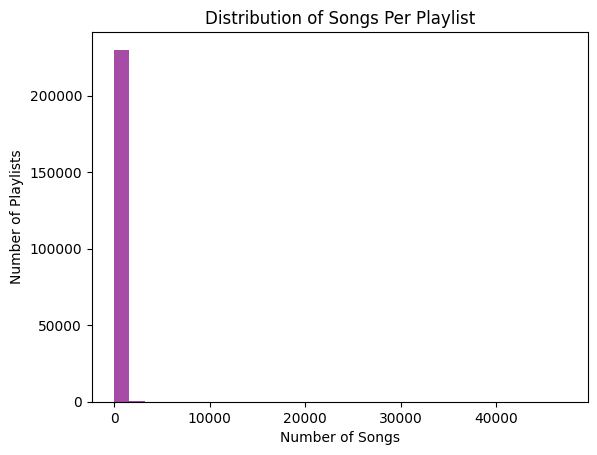

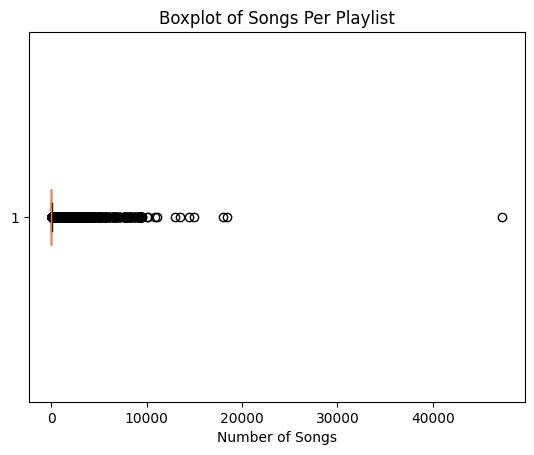

In [19]:
from matplotlib import pyplot as plt
import seaborn as sns

# Histogram for song distribution
plt.hist(songs_per_playlist, bins=30, color='purple', alpha=0.7)
plt.title("Distribution of Songs Per Playlist")
plt.xlabel("Number of Songs")
plt.ylabel("Number of Playlists")
plt.show()

# Boxplot for song distribution
plt.boxplot(songs_per_playlist, vert=False, patch_artist=True, boxprops=dict(color="navy"))
plt.title("Boxplot of Songs Per Playlist")
plt.xlabel("Number of Songs")
plt.show()


## Songs per artist

In [30]:
track_details_per_artist = df_cleaned_final.groupby('artist_name').agg({'song_name': ['nunique', list]})
track_details_per_artist.columns = ['unique_song_count', 'song_names_list']

# Sort in descending order (most songs first)
sorted_by_song_count_desc = track_details_per_artist.sort_values(by='unique_song_count', ascending=False)
sorted_by_song_count_desc.head(10)

,unique_song_count,song_names_list
artist_name,,
various artists,6725,"[various artists - i fancy laura marling, vari..."
johann sebastian bach,6303,"[johann sebastian bach - air, johann sebastian..."
wolfgang amadeus mozart,4510,[wolfgang amadeus mozart - piano sonata no. 11...
vitamin string quartet,3597,[vitamin string quartet - jack and sally monta...
grateful dead,3378,[grateful dead - box of rain - remastered vers...
frank sinatra,2966,"[frank sinatra - serenade in blue, frank sinat..."
ella fitzgerald,2845,"[ella fitzgerald - dream a little dream of me,..."
ludwig van beethoven,2425,"[ludwig van beethoven - fur elise, ludwig van ..."
lata mangeshkar,2419,"[lata mangeshkar - tujhe dekha to yeh, lata ma..."


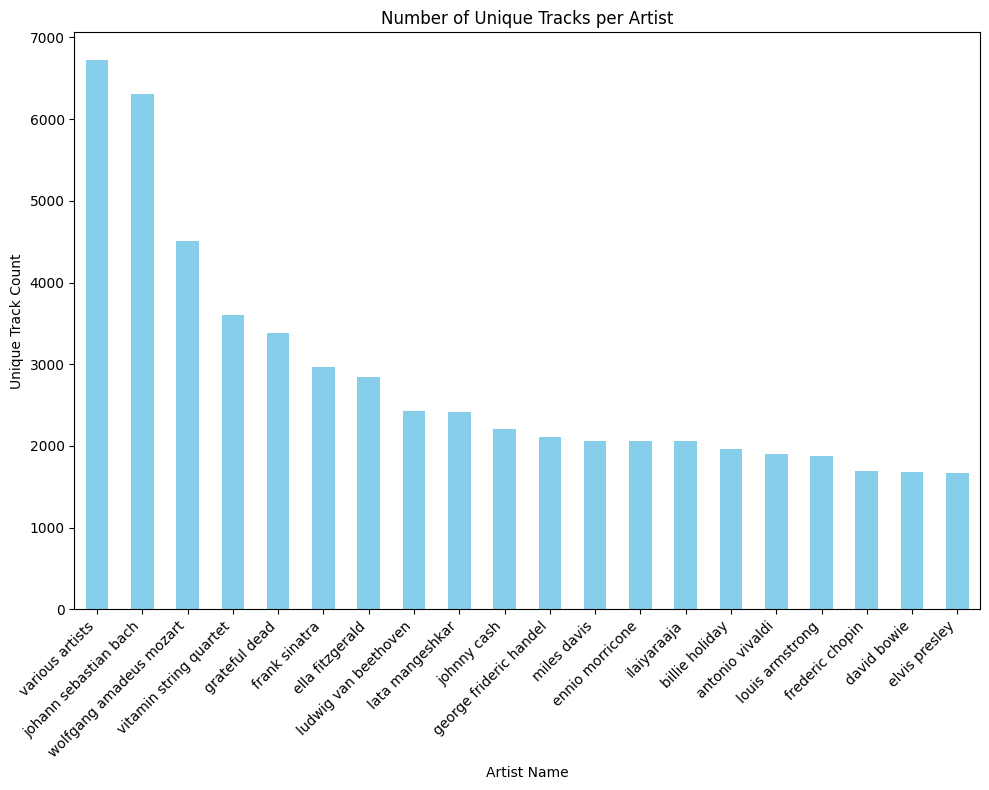

In [31]:
from matplotlib import pyplot as plt

# Plotting the sorted data
plt.figure(figsize=(10, 8))  # You can adjust the figure size if needed
sorted_by_song_count_desc['unique_song_count'].head(20).plot(kind='bar', color='skyblue')  # Plot top 20 artists

plt.title('Number of Unique Tracks per Artist')
plt.xlabel('Artist Name')
plt.ylabel('Unique Track Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


## Playlists Lengths

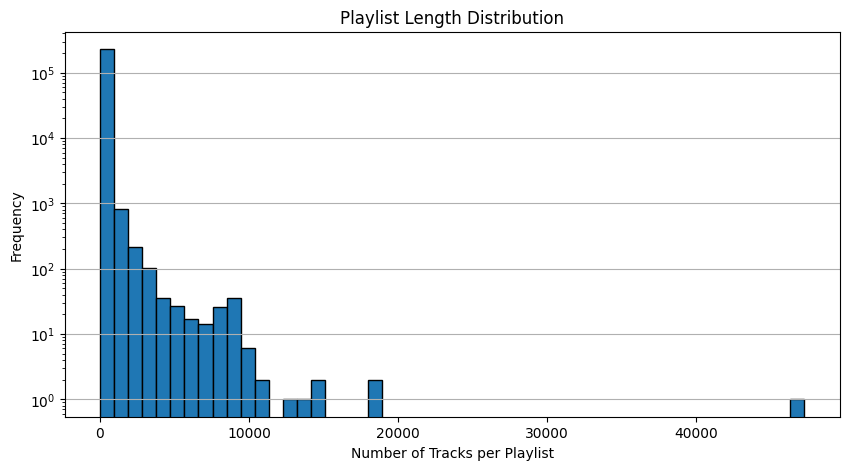

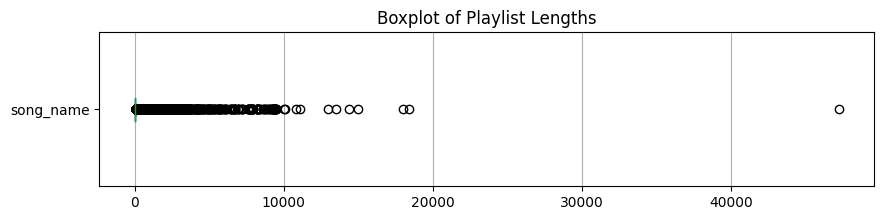

Playlist Length Statistics:
count    230708.000000
mean         55.238930
std         269.603424
min           1.000000
25%          11.000000
50%          16.000000
75%          38.000000
max       47259.000000
Name: song_name, dtype: float64


In [35]:
import matplotlib.pyplot as plt

# Calculate playlist lengths
playlist_lengths = df_cleaned_final.groupby('unq_playlist_name')['song_name'].count()

# Save the playlist lengths for reference
playlist_lengths.to_csv('playlist_lengths.csv')

# Plot histogram for playlist lengths
plt.figure(figsize=(10, 5))
playlist_lengths.plot(kind='hist', bins=50, edgecolor='black', logy=True)
plt.title('Playlist Length Distribution')
plt.xlabel('Number of Tracks per Playlist')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.show()

# Boxplot to visualize outliers
plt.figure(figsize=(10, 2))
playlist_lengths.plot(kind='box', vert=False)
plt.title('Boxplot of Playlist Lengths')
plt.grid(axis='x')
plt.show()

# Basic statistics of playlist lengths
print("Playlist Length Statistics:")
print(playlist_lengths.describe())


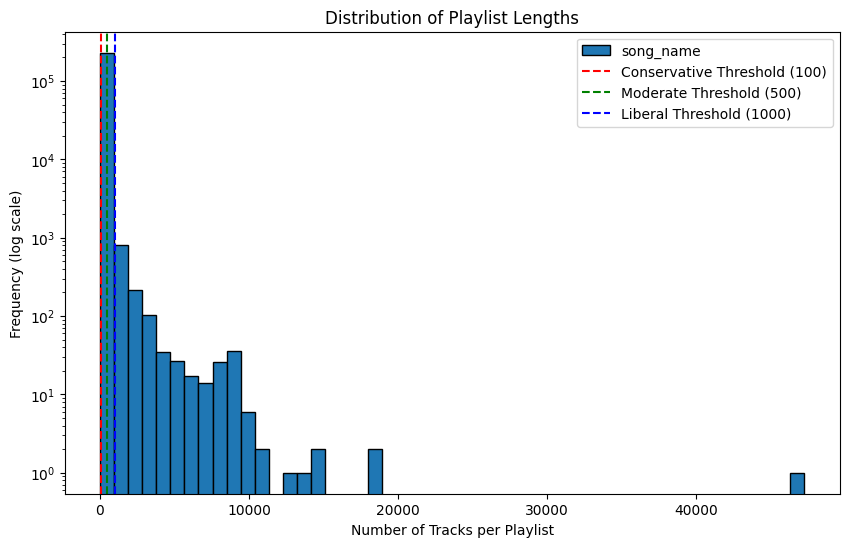

In [37]:
import matplotlib.pyplot as plt

# Plot histogram of playlist lengths
playlist_lengths = df_cleaned_final.groupby('unq_playlist_name')['song_name'].count()
plt.figure(figsize=(10, 6))
playlist_lengths.plot(kind='hist', bins=50, edgecolor='black', logy=True)
plt.axvline(x=100, color='red', linestyle='--', label='Conservative Threshold (100)')
plt.axvline(x=500, color='green', linestyle='--', label='Moderate Threshold (500)')
plt.axvline(x=1000, color='blue', linestyle='--', label='Liberal Threshold (1000)')
plt.title('Distribution of Playlist Lengths')
plt.xlabel('Number of Tracks per Playlist')
plt.ylabel('Frequency (log scale)')
plt.legend()
plt.show()


# Summary

In [33]:
# Analyze unique values in columns
df_cleaned_final.nunique()

,0
user_id,15898
artist_name,279659
track_name,1854974
playlist_name,143640
song_name,2658530
unq_playlist_name,230708


In [34]:
# Describe the dataset
df_cleaned_final.describe(include='all')

,user_id,artist_name,track_name,playlist_name,song_name,unq_playlist_name
count,12744063,12744063,12744063,12744063,12744063,12744063
unique,15898,279659,1854974,143640,2658530,230708
top,4398de6902abde3351347b048fcdc287,daft punk,intro,starred,m83 - midnight city,4398de6902abde3351347b048fcdc287 - starred
freq,294764,35935,6709,1327148,2605,47259


# Steps for further preprocessing of the data



* removing outliers - playlists of many songs, playlists of few songs
* removing "various artists" songs
* capping playlists from certain lengths
* tokenizing playlists

#### note - for reducing data volume, you can safely remove the "playlist_name" and "track_name" columns, as they appear in more suitable formats in the dataset



## Capping example Use a Moderate Threshold (500) to filter out extremely long playlists while


In [ ]:
CAP_THRESHOLD = 500

# Filter playlists
valid_playlists = playlist_lengths[playlist_lengths <= CAP_THRESHOLD].index
df_final = df_cleaned_final[df_cleaned_final['playlist_name'].isin(valid_playlists)]

# Save the capped dataset
df_cleaned_final.to_csv('processed_data_capped_playlists.csv', index=False)
print(f"Filtered dataset saved with playlists capped at {CAP_THRESHOLD} tracks.")


Filtered dataset saved with playlists capped at 500 tracks.


## Tokenize Playlists

Transform playlists into tokenized sequences of tracks for later use in embedding generation.


In [5]:
# Group tracks by playlist into tokenized sequences
tokenized_playlists = df_cleaned_final.groupby('unq_playlist_name')['song_name'].apply(list)

# Save tokenized playlists for reference
tokenized_playlists.to_csv('tokenized_playlists.csv')
print("Tokenized playlists saved: tokenized_playlists.csv")

# Display an example of a tokenized playlist
print("Example of a tokenized playlist:")
print(tokenized_playlists.head())


Tokenized playlists saved: tokenized_playlists.csv
Example of a tokenized playlist:
unq_playlist_name
00055176fea33f6e027cd3302289378b - favs                [jannik brunke - 18, green day - 21 guns, shaw...
0007f3dd09c91198371454c608d47f22 - 2014                [colourshop - 2014, tom odell - another love, ...
0007f3dd09c91198371454c608d47f22 - fav songs           [bryan adams - (everything i do) i do it for y...
0007f3dd09c91198371454c608d47f22 - sad songs            [johnny cash - hurt, brandi carlile - the story]
000b0f32b5739f052b9d40fcc5c41079 - agnetha faltskog    [hootenanny singers - dansen pa sunnano, agnet...
Name: song_name, dtype: object


## Playlist Diversity Analysis

Analyze the diversity of playlists based on unique artists or tracks.


In [38]:
# Unique tracks per playlist
unique_tracks = df_cleaned_final.groupby('unq_playlist_name')['song_name'].nunique()
unique_tracks.to_csv('unique_tracks_per_playlist.csv')

# Unique artists per playlist
unique_artists = df_cleaned_final.groupby('unq_playlist_name')['artist_name'].nunique()
unique_artists.to_csv('unique_artists_per_playlist.csv')

# Display diversity statistics
print("Playlist Diversity (Tracks):")
print(unique_tracks.describe())

print("\nPlaylist Diversity (Artists):")
print(unique_artists.describe())


Playlist Diversity (Tracks):
count    230708.000000
mean         55.238930
std         269.603424
min           1.000000
25%          11.000000
50%          16.000000
75%          38.000000
max       47259.000000
Name: song_name, dtype: float64

Playlist Diversity (Artists):
count    230708.000000
mean         18.733208
std          67.789819
min           1.000000
25%           1.000000
50%           2.000000
75%          17.000000
max       16931.000000
Name: artist_name, dtype: float64
